# Mental health and substance use disorders -- Exploratory Data Analysis


## Outline:
1.   Problem Identification 

2.   Data Wrangling 
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Data visualization
 * Statistics

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation

## Overview

In this notebook, I will focus on Exploratory Data Analysis for different datasets. Here are some summaries from three different datasets.

**1.** The first dataset includes a few prevalence mental health disorders rate, its share of total disease burden, the direct death from mental and substance use disorders, and suicide rate presented in 231 entities from 1997 to 2017. 

* From the profile table, I notice that 13% of people are suffering from mental and substance use disorders in the world.
* After checking the outlier countries, I notice that all outliers are upper outliers and outlier countries are either big countries or rich countries. 
* I also observed that Alcohol use disorder has a positive correlation with the Suicide rate. 
* All countries behave differently in different decades. And for most features, the biggest increase has decreased decades in decades. 
* I also checked the relationship between disorders rate and GDP per capita, observed a strong positive correlation between 'Mental health and substance use disorders as a share of total disease burden' and GDP per capita, between Eating disorders and GDP per capita.
* I then checked how Mental health and substance use disorders and Eating disorder behave in the top three richest and poorest countries. Rich countries tend to have more people suffering from mental health and substance use disorders than poor countries.

**2.** Second, I explored the share of population by age groups suffering from any mental health or substance use disorders data.
* I visualized 5-14 years old, 15-49 years old, 50-69 years old, 70+ years old, and age-standardized age groups at the whole world level. 50-69 years old age group shows the highest percentage, the 5-14 age group shows the lowest percentage.
* Mental health or substance use disorders rate is decreasing for most age groups in the whole world level through 2000 to now.
* I used Simpson's paradox method to compare different age groups with GDP in all countries. The correlation between GDP with each age group is different, if we want to determine the effect of GDP per capita on the probability of disease, we need to control for the age of patients. 

**3.** Then I checked the share of mental health and substance use disorders by sex data. I compared the rate for males and females and checked if there's a significant difference between them. From both t-test and permutation test, the difference between male and female is significant, and the female has a higher rate. 

**First, let's load the data.**

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is C:\Users\yuhan\Desktop\Springboard\Capstone project-2


In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Capstone Two - Project Proposal.pdf',
 'data',
 'figures',
 'Mental health and substance disorders data',
 'Mental health and substance use disorders_data wrangling.ipynb',
 'Mental health and substance use disorders_EDA.ipynb',
 'Mental health and substance use disorders_Modeling.ipynb',
 'Mental health and substance use disorders_Pre-Processing and Training Data Development.ipynb',
 'models',
 'Project final report.docx.pdf',
 'README.ipynb',
 'README.md']

In [5]:
path = 'data'
os.chdir(path)

In [6]:
os.listdir()

['GDP_per_capita_output.csv',
 'mental_substance_age_output.csv',
 'mental_substance_gdp_output.csv',
 'mental_substance_gender_output.csv',
 'mental_substance_output.csv']

In [7]:
gdpPerCapita = pd.read_csv('GDP_per_capita_output.csv', index_col=0)
gdpPerCapita.head()

,Entity,Code,Year,GDP per capita ($)
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


In [8]:
ageGroups = pd.read_csv('mental_substance_age_output.csv', index_col=0)
ageGroups.head()

,Entity,Code,Year,10-14 years old (%),15-19 years old (%),20-24 years old (%),25-29 years old (%),30-34 years old (%),All ages (%),5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
0,Afghanistan,AFG,1990,17.963929,20.746551,20.394054,20.968224,21.363230,16.471540,14.857525,20.796416,17.911218,14.549360,17.553463
1,Afghanistan,AFG,1991,18.308466,21.059514,20.690527,21.226918,21.628881,16.750416,15.122301,21.064413,18.109323,14.680612,17.837032
2,Afghanistan,AFG,1992,18.618200,21.360629,20.975017,21.437639,21.855734,17.022630,15.353386,21.309476,18.300797,14.795600,18.092542
3,Afghanistan,AFG,1993,18.854464,21.590949,21.184427,21.595253,22.046316,17.208295,15.529752,21.498997,18.464068,14.886083,18.294931
4,Afghanistan,AFG,1994,19.022019,21.741705,21.313204,21.725390,22.158546,17.230492,15.624982,21.635443,18.558568,14.941922,18.428908


In [9]:
gender = pd.read_csv('mental_substance_gender_output.csv', index_col=0)
gender.head()

,Entity,Code,Year,Male (%),Female (%)
0,Afghanistan,AFG,1990,17.448695,17.634233
1,Afghanistan,AFG,1991,17.771263,17.873184
2,Afghanistan,AFG,1992,18.051575,18.092318
3,Afghanistan,AFG,1993,18.275848,18.265196
4,Afghanistan,AFG,1994,18.427490,18.383394


In [10]:
mental_sub = pd.read_csv('mental_substance_output.csv', index_col=0)
mental_sub.head()

,Entity,Code,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%)
0,Afghanistan,AFG,1990,17.553463,1.320975,0.144067,10.318504,0.672404,1.677082,4.071831,0.697779,4.828830,0.101855,0.160560
1,Afghanistan,AFG,1991,17.837032,1.354445,0.140653,10.327010,0.671768,1.684746,4.079531,0.697961,4.829740,0.099313,0.160312
2,Afghanistan,AFG,1992,18.092542,1.506504,0.135279,10.271411,0.670644,1.694334,4.088358,0.698107,4.831108,0.096692,0.160135
3,Afghanistan,AFG,1993,18.294931,1.487670,0.133047,10.376123,0.669738,1.705320,4.096190,0.698257,4.830864,0.094336,0.160037
4,Afghanistan,AFG,1994,18.428908,1.389687,0.130073,10.575915,0.669260,1.716069,4.099582,0.698469,4.829423,0.092439,0.160022


## Explore mental_sub dataframe 
Try to understand why mental health and substance use disorders are important, and the relationship between suicide and GDP per capita.
### Build data profiles and tables

In [11]:
mental_sub.describe()

,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,13.004642,4.642531,5.014424,12.068240,1.585821,0.862278,3.497654,0.719145,3.989921,0.239998,0.211644
std,8.078372,1.848711,2.233705,9.795962,8.037739,0.860283,0.460679,0.655859,0.171589,1.167526,0.158141,0.044253
min,1990.000000,9.715255,0.174323,0.034565,1.526792,0.446940,0.383650,2.139903,0.314535,2.023393,0.073908,0.146902
25%,1996.750000,11.488694,2.825027,0.356321,6.741737,0.993685,0.535064,3.005529,0.615532,3.188824,0.122387,0.181530
50%,2003.500000,12.484004,4.512848,1.254213,10.668531,1.479937,0.726430,3.499606,0.693134,3.554373,0.182525,0.199563
75%,2010.250000,14.274301,6.342170,4.235866,14.742472,1.867834,0.940157,3.912381,0.835063,4.682163,0.292666,0.236365
max,2017.000000,19.115460,12.031016,89.797874,98.831696,5.474668,3.452476,6.602754,1.206597,8.967330,0.943991,0.375110


* The mean of mental and substance use disorders share of population is 13%, this is a very high number, that means there are 13 people is suffering on mental and substance use disorders per 100 people in the world.
* Higher people rate are suffering from depressive disorder (3.4977%) and anxiety disorder(3.9899%).

#### Reviewing for Outliers and Anamolies

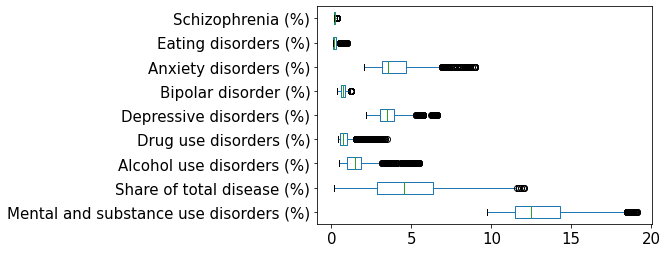

In [12]:
# The columns of suicide rate and Deaths - Mental and substance use disorders (per 100,000) have bigger range
# I will run boxplot seperately
mental_sub.drop(columns=['Year', 
                         'Deaths - Mental and substance use disorders (per 100,000)',
                        'Suicide Rate (per 100,000)']).boxplot(grid=False, vert=False,fontsize=15)

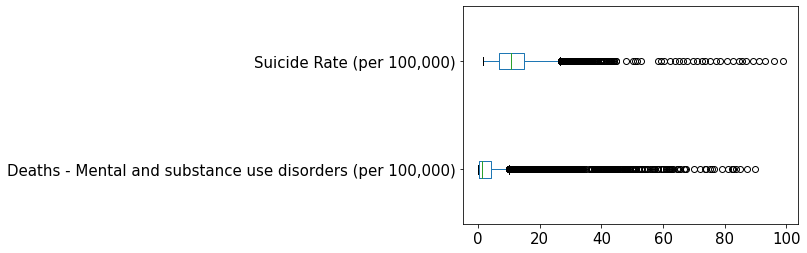

In [13]:
mental_sub[['Deaths - Mental and substance use disorders (per 100,000)',
           'Suicide Rate (per 100,000)']].boxplot(grid=False, vert=False,fontsize=15)

It shows all columns have outliers with more 1.5×IQR above the third quartile. All outliers are upper outliers. Here, I am interested in which wntities are outliers and if they are constantly being an outlier through years and top frequency entities.

**1. Check the outlier entities.**

In [14]:
# get the outliers
Q1 = mental_sub.quantile(0.25)
Q3 = mental_sub.quantile(0.75)
IQR = Q3 - Q1

# Outliers
mental_sub_o = mental_sub[((mental_sub < (Q1 - 1.5 * IQR)) |(mental_sub > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
mental_sub_no = mental_sub.drop(mental_sub_o.index)

In [15]:
# check the number of countries being outliers
mental_sub_o.Entity.nunique()

87

In [16]:
mental_sub.Entity.nunique()

231

There are 87 entites are outliers, it is a large propotion from 231 entities. 

**2. Check the outlier frequency for each country**

In [17]:
# check which countries are constantly being an outlier through years
outlier = pd.DataFrame(mental_sub_o.groupby(by=['Entity']).size())
outlier.columns = ['Frequency']

outlier.sort_values(['Frequency'], ascending=False, inplace=True)
outlier.reset_index(inplace=True)

In [18]:
outlier.Entity.values

array(['Afghanistan', 'Russia', 'Qatar', 'Norway', 'High SDI',
       'High-income', 'High-income Asia Pacific', 'Northern Ireland',
       'Iceland', 'Iran', 'Iraq', 'North America', 'Italy', 'Japan',
       'New Zealand', 'Netherlands', 'Morocco', 'Moldova', 'Malta',
       'Latvia', 'Luxembourg', 'Greenland', 'Germany', 'Libya', 'France',
       'Andorra', 'Australasia', 'Australia', 'Western Europe', 'Bahrain',
       'Belarus', 'United States', 'Brunei', 'Canada',
       'Central Europe, Eastern Europe, and Central Asia', 'China',
       'United Arab Emirates', 'Ukraine', 'Switzerland', 'Eastern Europe',
       'Spain', 'South Korea', 'Estonia', 'Finland', 'Lithuania',
       'Lebanon', 'Austria', 'Scotland', 'Wales', 'United Kingdom',
       'England', 'Kazakhstan', 'Kiribati', 'East Asia', 'Belgium',
       'Panama', 'Lesotho', 'Kyrgyzstan', 'Zimbabwe', 'Sri Lanka',
       'Ireland', 'Denmark', 'Greece', 'North Africa and Middle East',
       'Swaziland', 'Algeria', 'Uganda', 'S

In [19]:
outlier.Frequency.values

array([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 26, 26, 25, 25, 25,
       24, 23, 23, 22, 20, 19, 19, 18, 16, 15, 15, 15, 14, 13, 13, 12, 12,
       12, 11, 11, 10,  9,  9,  9,  9,  8,  8,  8,  7,  6,  6,  6,  6,  1,
        1,  1], dtype=int64)

In [20]:
# check which entities are outliers for 28 years
outlier_28 = outlier[outlier.Frequency == 28]
outlier_28.Entity.values

array(['Afghanistan', 'Russia', 'Qatar', 'Norway', 'High SDI',
       'High-income', 'High-income Asia Pacific', 'Northern Ireland',
       'Iceland', 'Iran', 'Iraq', 'North America', 'Italy', 'Japan',
       'New Zealand', 'Netherlands', 'Morocco', 'Moldova', 'Malta',
       'Latvia', 'Luxembourg', 'Greenland', 'Germany', 'Libya', 'France',
       'Andorra', 'Australasia', 'Australia', 'Western Europe', 'Bahrain',
       'Belarus', 'United States', 'Brunei', 'Canada',
       'Central Europe, Eastern Europe, and Central Asia', 'China',
       'United Arab Emirates', 'Ukraine', 'Switzerland', 'Eastern Europe',
       'Spain', 'South Korea', 'Estonia', 'Finland', 'Lithuania'],
      dtype=object)

In [21]:
len(outlier_28) / len(outlier)

0.5172413793103449

More than half of outliers are being outliers every year. They include some big countries like the United States, China, and Canada, include some richest countries like Qatar, Luxembourg, Switzerland, and Iceland. But the interesting thing is there are no poorest countries being outliers for 28 years. A reminder that all outliers here are upper outliers.

### Explore data relationships

Here, I am interested in how Deaths and Suicide Rates relative to Mental and substance use disorders.

I checked the correlation for the dataset.

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

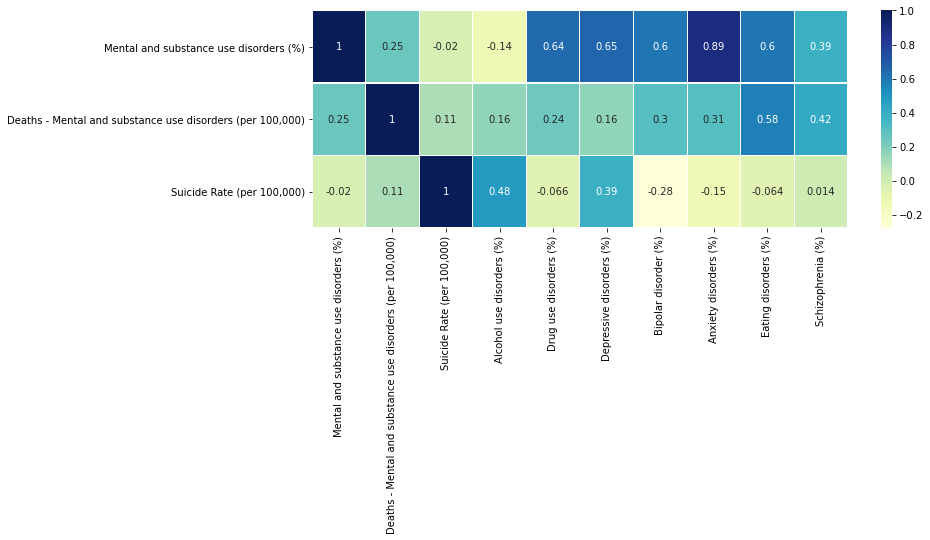

In [22]:
plt.figure(figsize=(12,4))
sns.heatmap(mental_sub.drop(columns=['Year', 'Share of total disease (%)']).corr().head(3),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

**The direct death from mental and substance use disorders has a higher positive correlation with Eating disorders.** 

But from the plots showed below, we don't see relationships between them.

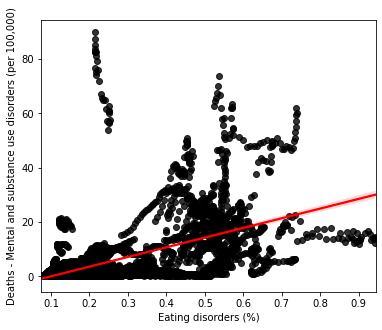

In [23]:
# Visualize the ralationship between direct death from mental and substance use disorders and Eating disorders
plt.figure(figsize=(6,5))
sns.regplot(x = 'Eating disorders (%)', y = 'Deaths - Mental and substance use disorders (per 100,000)', data=mental_sub
           , scatter_kws={"color": "black"}, line_kws={"color": "red"})

**Suicide rate has a positive correlation with Depressive disorders and Alcohol use disorders.**
* From the plots showed below, we don't see relationships between Suicide rate and Depressive disorders.
* After removing the points over 50, we do see a positive correlation between Suicide rate and Alcohol use disorders.

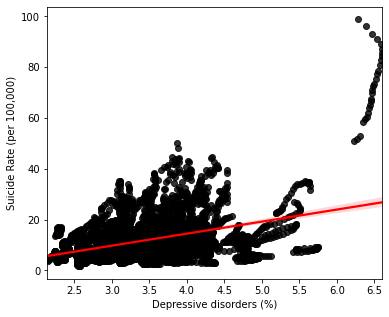

In [24]:
# Visualize the ralationship between Suicide rate and Depressive disorders
plt.figure(figsize=(6,5))
sns.regplot(x = 'Depressive disorders (%)', y = 'Suicide Rate (per 100,000)', data=mental_sub
           , scatter_kws={"color": "black"}, line_kws={"color": "red"})

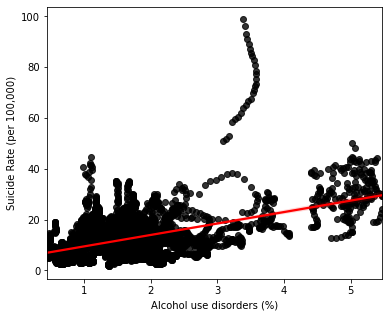

In [25]:
# Visualize the ralationship between Suicide rate and Alcohol use disorders
plt.figure(figsize=(6,5))
sns.regplot(x = 'Alcohol use disorders (%)', y = 'Suicide Rate (per 100,000)', data=mental_sub
           , scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\suicide_alcohol_correlation_1.png')

It looks like the points over 50 impacts the visualization, let's change the y-axis range to plot the figure again.

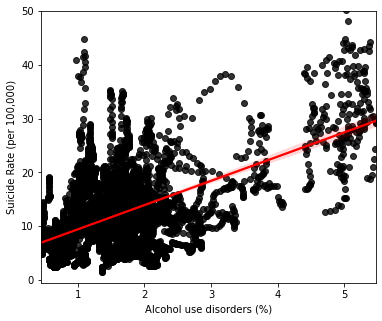

In [26]:
# change the range of y-axies
plt.figure(figsize=(6,5))
sns.regplot(x = 'Alcohol use disorders (%)', y = 'Suicide Rate (per 100,000)', data=mental_sub
           , scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.ylim([-0.5,50])
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\suicide_alcohol_correlation_2.png')

### Check how mental and substance use disorders increase in decades

I notice that the top 3 countries with the biggest increase for each decade are almost different. And for most features, the biggest increase has decreased decades in decades. 

In [27]:
# make functions to get the top 3 coutries with biggest change from 1990 to 1999, from 2000 to 2009, and from 2010 to 2017
# make a function to conver the year row to columns and calculate the change in each decades
def change(data, c):
    cols = [0, 1, 2, c]
    data_change = data[data.columns[cols]]
    data_change = data_change.pivot_table(index=['Entity','Code'], columns=['Year'], values=data_change.columns[3])
    data_change.reset_index(level=1, drop=True, inplace=True)
    data_change.columns.names = [None]
    data_change['1990 ~ 1999'] = data_change[1999] - data_change[1990]
    data_change['2000 ~ 2009'] = data_change[2009] - data_change[2000]
    data_change['2010 ~ 2017'] = data_change[2017] - data_change[2010]
    return data_change

# function to display dataframes side by side
from IPython.display import display_html 
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# function to get the top 3 coutries with biggest change for each feature
def top_3(data):
    top3_90_99 = data.sort_values(['1990 ~ 1999'], ascending=False).head(3)[['1990 ~ 1999']]
    top3_00_09 = data.sort_values(['2000 ~ 2009'], ascending=False).head(3)[['2000 ~ 2009']]
    top3_10_17 = data.sort_values(['2010 ~ 2017'], ascending=False).head(3)[['2010 ~ 2017']]
    return display_side_by_side(top3_90_99, top3_00_09, top3_10_17)

In [28]:
for i in range(3, len(mental_sub.columns)):
    df = change(mental_sub, i)
    print(str(mental_sub.columns[i]) + '-- top 3 countries with the biggest increase')
    print(top_3(df))

Mental and substance use disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Afghanistan,0.849154
Brazil,0.797578
Netherlands,0.625952
,2000 ~ 2009
Entity,
Australia,0.372023
Somalia,0.368775
Italy,0.250366
,2010 ~ 2017


None
Share of total disease (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Oman,2.603264
Iran,2.471015
Saudi Arabia,2.354491
,2000 ~ 2009
Entity,
Bahrain,2.730412
Maldives,2.392986
Qatar,2.070894
,2010 ~ 2017


None
Deaths - Mental and substance use disorders (per 100,000)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Japan,26.859570
United Kingdom,21.074111
Denmark,15.362109
,2000 ~ 2009
Entity,
Netherlands,27.500670
Austria,20.266403
Belgium,14.851258
,2010 ~ 2017


None
Suicide Rate (per 100,000)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Belarus,15.190352
Russia,14.170576
Lithuania,12.170801
,2000 ~ 2009
Entity,
South Korea,9.190240
Lesotho,6.431612
Armenia,4.412898
,2010 ~ 2017


None
Alcohol use disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Finland,0.608835
Russia,0.501899
Belarus,0.492894
,2000 ~ 2009
Entity,
Mongolia,0.896905
Kazakhstan,0.754084
Moldova,0.318380
,2010 ~ 2017


None
Drug use disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
United Arab Emirates,0.593717
Canada,0.465805
United States,0.432802
,2000 ~ 2009
Entity,
Afghanistan,0.755489
United Arab Emirates,0.453540
Libya,0.398783
,2010 ~ 2017


None
Depressive disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Brazil,0.500311
Uganda,0.432320
Lebanon,0.341080
,2000 ~ 2009
Entity,
Belgium,0.304957
Lesotho,0.264746
Liberia,0.257670
,2010 ~ 2017


None
Bipolar disorder (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Australia,0.015603
France,0.014279
Malaysia,0.011265
,2000 ~ 2009
Entity,
Iceland,0.041795
Spain,0.018432
New Zealand,0.011768
,2010 ~ 2017


None
Anxiety disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Netherlands,0.662672
New Zealand,0.657239
Brazil,0.462729
,2000 ~ 2009
Entity,
Italy,0.312936
Iran,0.308767
Brazil,0.270857
,2010 ~ 2017


None
Eating disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Luxembourg,0.079766
Australia,0.077231
United States Virgin Islands,0.070926
,2000 ~ 2009
Entity,
Australia,0.131537
Equatorial Guinea,0.117369
United States Virgin Islands,0.083915
,2010 ~ 2017


None
Schizophrenia (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Equatorial Guinea,0.011113
Malaysia,0.010585
Thailand,0.009097
,2000 ~ 2009
Entity,
Denmark,0.016710
Equatorial Guinea,0.014659
Myanmar,0.011173
,2010 ~ 2017


None


**Let's only focus on mental health and substance use disorder rate column.**

In [29]:
for i in range(3, 4):
    df = change(mental_sub, i)
    print(str(mental_sub.columns[i]) + '-- top 3 countries with the biggest increase')
    print(top_3(df))

Mental and substance use disorders (%)-- top 3 countries with the biggest increase


,1990 ~ 1999
Entity,
Afghanistan,0.849154
Brazil,0.797578
Netherlands,0.625952
,2000 ~ 2009
Entity,
Australia,0.372023
Somalia,0.368775
Italy,0.250366
,2010 ~ 2017


None


Non of the country appears twice in the above table for each decade. Let's check how these 9 countries behave in each decade.

In [30]:
top_change_countries = ['Afghanistan', 'Brazil', 'Netherlands', 'Australia', 'Somalia', 
                        'Italy', 'Libya', 'Japan', 'South Korea']

In [31]:
# create the dataframe with only mental health and substance use disorder rate column and the change in decades 
df = change(mental_sub, 3)

# filter the three decades
cols = ['1990 ~ 1999', '2000 ~ 2009', '2010 ~ 2017']
df_de = df[cols].sort_values(['1990 ~ 1999'], ascending=False)

# filter those 9 countries
df_c = df_de[df_de.index.get_level_values('Entity').isin(top_change_countries)]
df_c

,1990 ~ 1999,2000 ~ 2009,2010 ~ 2017
Entity,,,
Afghanistan,0.849154,-1.085967,-0.372593
Brazil,0.797578,-0.173188,-0.404024
Netherlands,0.625952,-0.588988,0.075779
Somalia,0.481309,0.368775,-0.609908
Australia,0.179127,0.372023,-0.237284
South Korea,0.157959,0.030811,0.168606
Libya,0.101766,0.039928,0.234751
Japan,-0.052152,0.141358,0.200297
Italy,-0.600999,0.250366,0.025461


Very interesting, only Japan is increasing with increasing change in decades. Australia and Italy have increased in population from 2000 to 2009. South Korea and Libya have decreased from 2000 to 2009 and jump back increased from 2010 to 2017.  

### Check the relationship between mental health and substance use disorders rate and GDP per capita

In [32]:
# Merge two datasets
df_1 = mental_sub.set_index(['Entity', 'Code', 'Year'])
df_2 = gdpPerCapita.set_index(['Entity', 'Code', 'Year'])
dataframes = [df_1, df_2]
df_merged = pd.concat(dataframes, axis=1).dropna()
df_merged.reset_index(inplace=True)
df_merged.head()

,Entity,Code,Year,Mental and substance use disorders (%),Share of total disease (%),"Deaths - Mental and substance use disorders (per 100,000)","Suicide Rate (per 100,000)",Alcohol use disorders (%),Drug use disorders (%),Depressive disorders (%),Bipolar disorder (%),Anxiety disorders (%),Eating disorders (%),Schizophrenia (%),GDP per capita ($)
0,Afghanistan,AFG,2002,18.137951,1.721417,0.081991,11.054472,0.659213,1.934326,4.124928,0.701141,4.838318,0.087023,0.162414,1063.635574
1,Afghanistan,AFG,2003,17.958849,1.800411,0.081942,10.931093,0.657354,2.051106,4.125230,0.701860,4.845538,0.087189,0.162916,1099.194507
2,Afghanistan,AFG,2004,17.788825,1.881324,0.082468,10.839790,0.656132,2.163044,4.126384,0.702556,4.851512,0.088158,0.163377,1062.249360
3,Afghanistan,AFG,2005,17.647911,1.989248,0.081971,10.655626,0.655686,2.247443,4.126908,0.703078,4.854684,0.088933,0.163706,1136.123214
4,Afghanistan,AFG,2006,17.539914,2.035171,0.082571,10.538475,0.656297,2.321020,4.128638,0.703517,4.856685,0.090054,0.163977,1161.124889


(array([0.5]), <a list of 1 Text major ticklabel objects>)

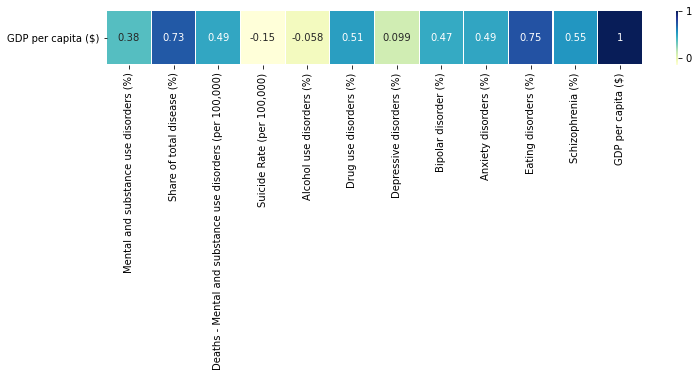

In [33]:
plt.figure(figsize=(12,1))
sns.heatmap(df_merged.drop(columns=['Year']).corr().tail(1),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

It shows there is a stronger positive correlation between 'Mental health and substance use disorders as a share of total disease burden' and GDP per capita, Eating disorders, and GDP per capita.

#### Let's visualize how well they are related. 

In [34]:
cols = ['Share of total disease (%)', 'Eating disorders (%)']

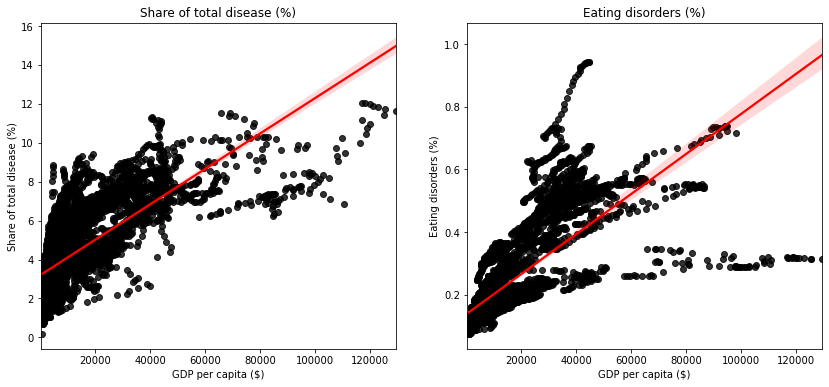

In [35]:
plt.figure(figsize = (14, 6))
for i in range(len(cols)):
    j = i + 1
    ax = plt.subplot(1, 2, j)
    sns.regplot(x = 'GDP per capita ($)', y = cols[i], data=df_merged, ax=ax, scatter_kws={"color": "black"}
           , line_kws={"color": "red"})
    plt.title(str(cols[i]))
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\GDP_correlation.png')

### Check the share of population with disorders in the top three richest and poorest countries.

From the above, we know that the economy is a risk factor for mental and substance use disorders. Here, I want to see how mental health and substance use disorders differ between rich and poor countries. I filtered the top 3 richest and poorest countries from the GDP per capita dataset (based on 2017). Then I plotted the Eating disorder and Mental health and substance use disorders trend for each country from 1990 to 2017. 
* For Eating disorder: 
  - All rich countries are a much more disorder rate than poor countries.
  - All rich countries show an increased rate year by year.
  - All poor countries show slightly change throughout the years.
* For Mental health and substance use disorders
  - The rich countries tend to have more people who have mental and substance use disorders, and poor countries have less. 
  - Singapore(rich) has fewer people rate than Burundi(poor).
  - The rates tend to decrease through the years.

In summary, rich countries tend to have more people suffering from mental health and substance use disorders than poor countries. 

In [36]:
# Top 3 richest countries in 2017
order = gdpPerCapita[gdpPerCapita.Year == 2017].sort_values(['GDP per capita ($)'], ascending=False)
order.head()

,Entity,Code,Year,GDP per capita ($)
4801,Qatar,QAT,2017,116935.600360
3470,Macao,MAC,2017,104861.851097
3442,Luxembourg,LUX,2017,94277.965357
5198,Singapore,SGP,2017,85535.383200
708,Brunei,BRN,2017,71809.250581


In [37]:
# Top 3 poorest countries in 2017
order.tail(3)

,Entity,Code,Year,GDP per capita ($)
3288,Liberia,LBR,2017,752.787839
792,Burundi,BDI,2017,702.225313
958,Central African Republic,CAF,2017,661.239968


In [38]:
# Filter top 3 richest, poorest countries
# there is no data for Macao in mental_sub, use Singapore instead
countries = ['Qatar', 'Luxembourg', 'Singapore', 'Burundi', 'Central African Republic', 'Liberia']
richest_poorest = mental_sub[mental_sub['Entity'].isin(countries)]

# Create a column to indicate the rich and poor countries
richest_poorest['Group'] = ['rich' if i in ['Qatar', 'Luxembourg', 'Singapore'] else 'poor' for i in richest_poorest.Entity.values]

C:\Users\yuhan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [39]:
richest_poorest.Group.unique()

array(['poor', 'rich'], dtype=object)

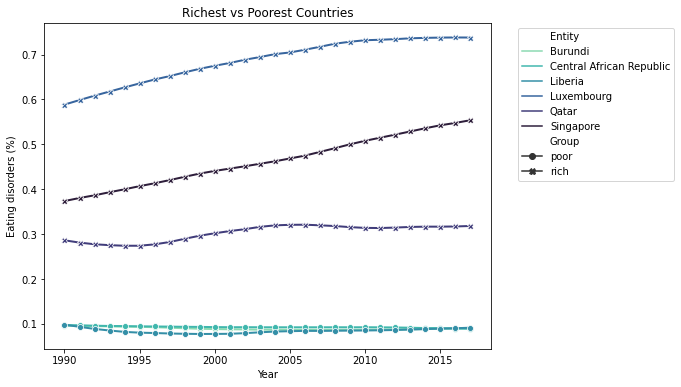

In [40]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data = richest_poorest, x = 'Year', 
             y='Eating disorders (%)', 
             hue='Entity', style='Group', markers=True, dashes=False, linewidth = 2, palette=palette)
plt.ylabel('Eating disorders (%)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Richest vs Poorest Countries")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\eating_richAndPoorCountry.png')

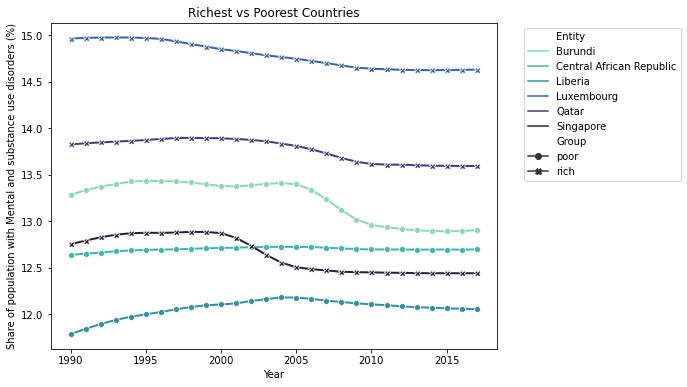

In [41]:
# plot the trend by year with Mental and substance use disorders (%)
plt.figure(figsize=(8,6))
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data = richest_poorest, x = 'Year', 
             y='Mental and substance use disorders (%)', 
             hue='Entity', style='Group', markers=True, dashes=False, linewidth = 2, palette=palette)
plt.ylabel('Share of population with Mental and substance use disorders (%)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Richest vs Poorest Countries")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\share_richAndPoorCountry.png')

## Explore the share of population by age groups suffering from any mental health or substance use disorders data

This dataset includes a few age groups that cover most age range. On average, it shows younger people who are under 14 years old have the lowest rate, and people who are between 15-49 years old have the highest rate. Dut to 15-19, 20-24, 25-29, 30-34 age groups have slightly different on average, 5-14, 15-49, 50-69, 70+, and age-standardized columns in the whole world level will be chosen for the future study, and also because those groups cover most age range.


In [42]:
ageGroups.describe()

,Year,10-14 years old (%),15-19 years old (%),20-24 years old (%),25-29 years old (%),30-34 years old (%),All ages (%),5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,13.843204,15.886122,14.865825,14.829490,15.090616,12.779463,10.392677,15.226406,14.742883,13.455206,13.004642
std,8.078372,2.133417,2.555961,2.676551,2.586980,2.530750,2.127102,1.794995,2.441716,1.420786,1.322891,1.848711
min,1990.000000,9.804068,10.998515,9.851233,10.196966,10.736103,9.304492,7.111707,10.873140,10.836164,9.662779,9.715255
25%,1996.750000,12.304926,13.757011,12.692713,12.717292,13.016868,11.009757,9.141420,13.207154,13.978356,12.573461,11.488694
50%,2003.500000,13.169728,15.307039,14.191402,14.164913,14.420812,12.241130,9.759759,14.678906,14.712730,13.494699,12.484004
75%,2010.250000,15.229774,17.701580,16.756932,16.692369,17.012245,14.505915,11.506956,17.002634,15.586071,14.247040,14.274301
max,2017.000000,21.570803,24.957525,25.081546,24.480835,23.860110,19.121172,17.027704,23.275827,19.423087,17.860393,19.115460


**Visulize the Mental and substance use disorders trend by age groups**

Trend by age groups in the world.

In [43]:
# filter 5-14, 15-49, 50-69, 70+ and age standardized columns 
ageGroups_2 = ageGroups[['Entity', 'Code', 'Year','5-14 years old (%)', '15-49 years old (%)', '50-69 years old (%)', '70+ years old (%)', 'Age-standardized (%)']]

In [44]:
# Filter world dataframe
ageGroups_world = ageGroups_2[ageGroups_2['Entity'].isin(['World'])]

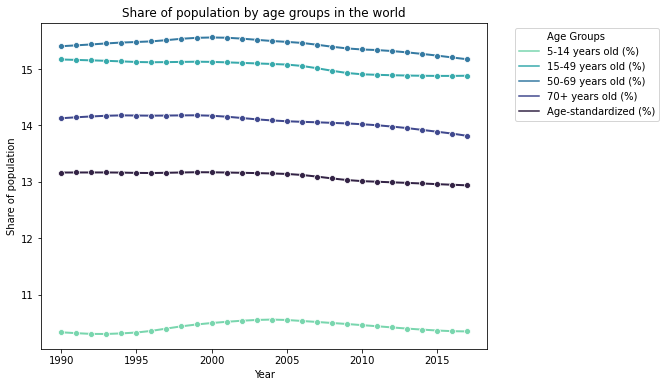

In [45]:
# Plot the trend by year for age groups
df = ageGroups_world.drop(columns=['Entity', 'Code']).melt('Year', var_name='Age Groups', value_name='Share of population')
plt.figure(figsize=(8,6))
palette = sns.color_palette("mako_r", 5)
sns.lineplot(data=df, x='Year', y='Share of population', hue='Age Groups', marker='o', linewidth = 2, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Share of population by age groups in the world")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\age_trend.png')

For the whole world level:
* 50-69 age group shows the highest percentage, but it went down since 2001.
* 15-19 age group shows the second-highest percentage, and it seems going up in recent years.
* 5-14 age group shows the lowest percentage

One thing that caught my eyes is that from 2000 to 2005, there is an increased jump for 5-14, 15-49, and 50-69 age groups. Let's take a closer look at how it changes over the years.

### Let's check how each age group changed in decades

In [46]:
# filter world entity from the data
ageGroups_world_change = ageGroups_world.drop(columns=['Entity', 'Code']).set_index('Year')

In [47]:
# Add percentage changed in decades to data
ageGroups_world_change.loc['1990~1999'] = ageGroups_world_change.loc[1999] - ageGroups_world_change.loc[1990]
ageGroups_world_change.loc['2000~2009'] = ageGroups_world_change.loc[2009] - ageGroups_world_change.loc[2000]
ageGroups_world_change.loc['2010~2017'] = ageGroups_world_change.loc[2017] - ageGroups_world_change.loc[2010]
ageGroups_world_change.loc['1990~2017'] = ageGroups_world_change.loc[2017] - ageGroups_world_change.loc[1990]

In [48]:
df = ageGroups_world_change.iloc[[-4, -3, -2, -1]]
df

,5-14 years old (%),15-49 years old (%),50-69 years old (%),70+ years old (%),Age-standardized (%)
Year,,,,,
1990~1999,0.138579,-0.039651,0.148670,0.052238,0.005527
2000~2009,-0.017157,-0.196632,-0.193836,-0.136963,-0.137190
2010~2017,-0.111813,-0.025862,-0.173806,-0.205912,-0.074675
1990~2017,0.015448,-0.288160,-0.230997,-0.311725,-0.226630


In [49]:
df = df.transpose()
df.columns.names = [None]
df.head()

,1990~1999,2000~2009,2010~2017,1990~2017
5-14 years old (%),0.138579,-0.017157,-0.111813,0.015448
15-49 years old (%),-0.039651,-0.196632,-0.025862,-0.288160
50-69 years old (%),0.148670,-0.193836,-0.173806,-0.230997
70+ years old (%),0.052238,-0.136963,-0.205912,-0.311725
Age-standardized (%),0.005527,-0.137190,-0.074675,-0.226630


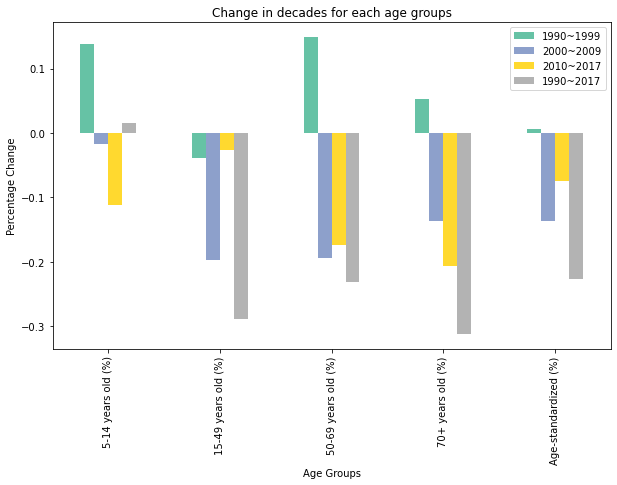

In [50]:
df.plot(kind='bar',figsize=(10,6), cmap='Set2')
plt.title('Change in decades for each age groups')
plt.xlabel('Age Groups')
plt.ylabel('Percentage Change')
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\age_decades.png')

* 1990~1999: only 15-49 age group mental health or substance use disorders decreased, 50-69 age group has maximum increase. 
* 2000~2009: all age group shows decrease, 15-49 and 50-69 age groups have a maximum decrease, 5-14 shows a minimum decrease.
* 2010~2017: all age group shows decrease, 50-69 and 70+ age groups have a maximum decrease, 5-14 shows a minimum decrease.
* 1990~2017: only 15-49 age group increased, 70+ age groups have a maximum decrease

The figure clearly showed that the mental health or substance use disorders rate is decreasing for most age groups in the whole world level through 2000 to now.

### Simpson's paradox method to compare different age groups with GDP in all countries

Let's check how GDP is related to different age groups. Are they in the same trend or different?

In [51]:
# combine agegoup and gdp datasets
df_1 = ageGroups_2.set_index(['Entity', 'Code', 'Year'])
df_2 = gdpPerCapita.set_index(['Entity', 'Code', 'Year'])
dataframes = [df_1, df_2]
df_age_gdp = pd.concat(dataframes, axis=1).dropna()
df_age_gdp.reset_index(inplace=True)

In [52]:
# Let's focus on 2017 first
age_gdp_2017 = df_age_gdp[df_age_gdp.Year==2017]

In [53]:
# plot scatter to visualize the relationships
# first, melt data
df_melt = age_gdp_2017.melt(id_vars=['Entity', 'Code', 'Year', 'GDP per capita ($)'], 
        var_name="Age Groups", 
        value_name="Rates (%)")
df_melt.head()

,Entity,Code,Year,GDP per capita ($),Age Groups,Rates (%)
0,Afghanistan,AFG,2017,1803.987487,5-14 years old (%),13.851344
1,Albania,ALB,2017,11803.430594,5-14 years old (%),9.313222
2,Algeria,DZA,2017,13913.839363,5-14 years old (%),11.308430
3,Angola,AGO,2017,5819.494971,5-14 years old (%),9.029206
4,Antigua and Barbuda,ATG,2017,21490.942659,5-14 years old (%),11.307221


In [54]:
groups = ['5-14 years old (%)', '15-49 years old (%)', '50-69 years old (%)', '70+ years old (%)']

#### Simpson's Paradox with Correlation 

In [55]:
# Definiton of relationship plotting funtion

from numpy.polynomial.polynomial import polyfit
def plot_relationship(data, t, ax):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data['GDP per capita ($)']), np.array(data['Rates (%)'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = 'GDP per capita ($)', y = 'Rates (%)', 
              style = 'o', c='black', legend = None, ax = ax, ms = 10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color = 'red');

    plt.title(str(t))

    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('Rates (%)')
    plt.xlabel('GDP per capita ($)'); 
    plt.text(0.55, 0.85, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

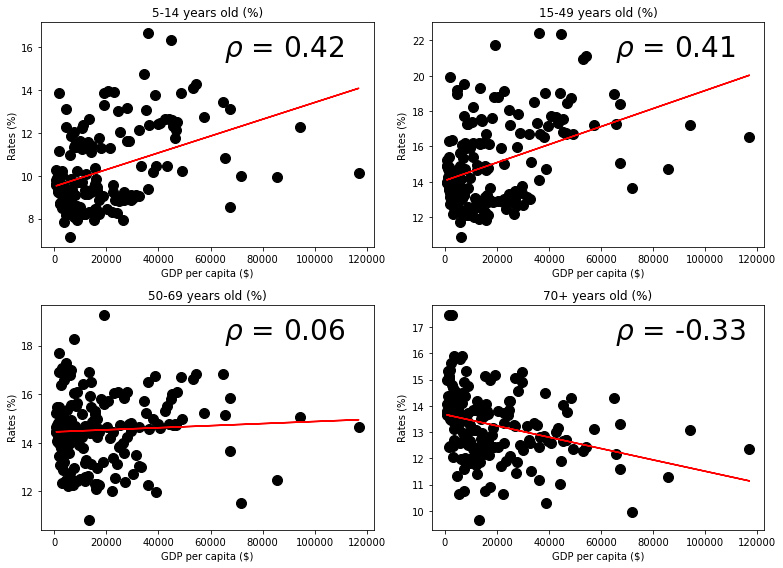

In [56]:
# plot different age group vs GDP 
plt.figure(figsize = (11, 8))
for i in range(len(groups)):
    data = df_melt[df_melt['Age Groups'].isin([groups[i]])]
    j = i + 1
    ax = plt.subplot(2, 2, j)
    plot_relationship(data, groups[i], ax)
plt.tight_layout()
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\age_simpson_1.png')

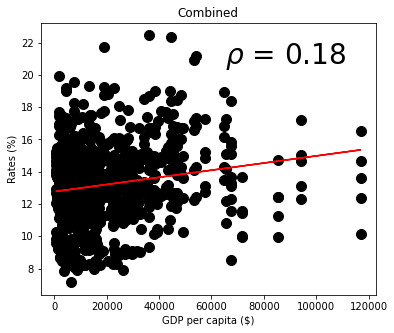

In [57]:
# plot all data vs GDP
plt.figure(figsize = (6, 5))
data = df_melt.copy()
ax = plt.subplot(1, 1, 1)
plot_relationship(data, 'Combined', ax)
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\age_simpson_2.png')

When looking at the data individually, there is a negative correlation between 70+ years old and GDP per capita, a positive correlation between 5-14 and 15-49 years old and GDP per capita, no correlation between 50-69 years old and GDP per capita, but,  when aggregating the data, the correlation is only slightly positive! It is due to the presence of another cause, age, on the chance of developing a disease. To determine the effect of GDP per capita on the probability of disease, we need to control for the age of patients.

## Explore the share-with-mental-or-substance-disorders-by-sex data

In [58]:
gender.describe()

,Year,Male (%),Female (%)
count,6468.000000,6468.000000,6468.000000
mean,2003.500000,12.610292,13.358836
std,8.078372,1.577035,2.208363
min,1990.000000,8.954316,9.625504
25%,1996.750000,11.377159,11.599258
50%,2003.500000,12.298189,12.797102
75%,2010.250000,13.577942,14.889568
max,2017.000000,18.494218,20.555132


In [59]:
diff_mean = 13.358836 - 12.610292
diff_mean

0.7485440000000008

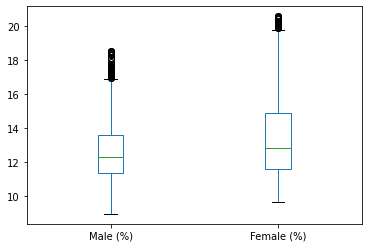

In [60]:
# check the boxplot
gender.boxplot(column=['Male (%)', 'Female (%)'], grid=False)
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-2\figures\gender_boxplot.png')

The mean percentage for the male is 12.610292 and the mean percentage for the female is 13.358836. It seems there is a significant difference between them with (13.358836 - 12.610292) = 0.748544 observed. We can also see a difference from the boxplot.

Let's use a statistical test to check if it's a significant difference between male and female.

### Outline:
1. Hypothesis formulation
2. Getting the distribution of the data
3. Statistic test (t-test and permutation test)
4. Conclusion

### 1. Hypothesis formulation

$H_{null}$: the observed difference in the mean percentage of Male and Female is due to chance (and thus not due to gender).


$H_{alternative}$: the observed difference in the mean percentage of Male and Female is not due to chance (and is actually due to gender)

We're also going to pick a significance level of 0.05.



### 2. Getting the distribution of the data

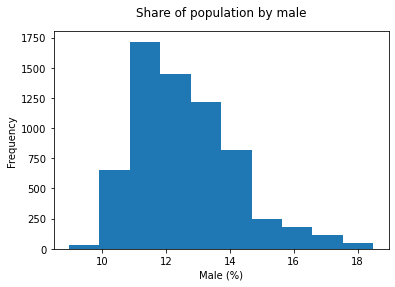

In [61]:
# Create a histogram of male
gender['Male (%)'].hist()
plt.title('Share of population by male', pad = 15)
plt.xlabel('Male (%)')
plt.ylabel("Frequency")
plt.grid(False)

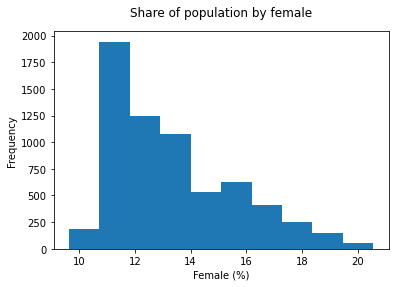

In [62]:
# Create a histogram of female
gender['Female (%)'].hist()
plt.title('Share of population by female', pad = 15)
plt.xlabel('Female (%)')
plt.ylabel("Frequency")
plt.grid(False)

In [63]:
# check whether male data is normally distributed with stats.normaltest() method
from scipy import stats
male_normal = stats.normaltest(gender['Male (%)'])
male_normal

NormaltestResult(statistic=735.4553903807321, pvalue=1.9855971272619783e-160)

In [64]:
# check whether female data is normally distributed with stats.normaltest() method
female_normal = stats.normaltest(gender['Female (%)'])
female_normal

NormaltestResult(statistic=651.5625634494528, pvalue=3.2733092637174737e-142)

Since the null hypothesis of the normaltest() is the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal.

The p-values for both tests are less than 0.05, and the distribution of the data visually with a histogram is not symmetric,  so the conclusion is that the data are not normally distributed. 

### 3. Statistic test
#### 3.1 t-test

Here, we use the t-test with Central Limit Theorem (CLT) because it applies to the sampling distributions of statistics that calculated from non-normal distributions of data.

In [65]:
# here, we use t-test function from scipy.stats to calculate the value of the test statistic and then its probability (the p-value).
from scipy.stats import ttest_ind
ttest_ind(gender['Male (%)'], gender['Female (%)'])

Ttest_indResult(statistic=-22.184424979735958, pvalue=4.758285755689205e-107)

The p-value is less than 0.05, we can reject the null hypothesis.

3.2 Permutation test

Since the data aren't normally distributed, we can also use a non-parametric test here -- permutation test. 

In [66]:
# Here I will use permutation_test function from mlxtend library
from mlxtend.evaluate import permutation_test

p_value = permutation_test(gender['Male (%)'], gender['Female (%)'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.0


The p-value from permutation test is 0, so we can reject the null hypothesis. 

### 4. Conclusion

The p-value from the t-test and permutation test is less than the significance level of 0.05. We can reject our null hypothesis. So our observed data is statistically significant that the mental and substance disorder between male and female are significantly different. And from the mean percentage, we can see that females tend to have higher rates than males.

## Next Step: Pre-Processing and Training Data Development

Next step, I will use a gender data frame to identify the country outliers using unsupervised clustering machine learning.